## Iteration 2: Sellers created after october 2022

In [46]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Functions:

In [47]:
def nan_rev(df):

    """
    Calculates and displays information about missing values in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.

    Returns:
    - percentage_nan (pandas.Series): The percentage of missing values for each column.
    - missing_values_distribution (pandas.Series): The distribution of missing values for each column.
    """
    # NaN values
    total_nan = df.isna().sum().sum()
    print(f"{df} has {total_nan} NaN values")

    percentage_nan = df.isna().sum() / df.shape[0] * 100.0
    print("The percentage of missing values for each column is:")
    print(percentage_nan)

    missing_values_distribution = df.isna().sum()
    print("Missing values distribution:")
    print(missing_values_distribution)

    return  percentage_nan, missing_values_distribution


In [48]:
def nan_vis(df):
    """
    Visualizes missing values in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.

    Returns:
    - str: A message indicating if there are any missing values or not.
    - If there are missing values, returns a bar graph with the missing values.
    """

    # Visualize missing values
    if df.isna().sum().sum() == 0:
        return "There are no missing values"
    else:
        plt.figure(figsize=(10, 6))
        plt.title("Missing Values")
        ax = sns.barplot(x=df.columns, y=df.isna().sum())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.xlabel("Columns")
        plt.ylabel("Missing Values Count")
        plt.show()

In [49]:
def basic_info(df):
    """
    Provides basic information about a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.

    Returns:
    - list: A tuple containing lists of categorical columns and numerical columns, respectively.
    """
    print(f"The shape of the df is {df.shape}")
    print(f"Number of datapoints: {df.count()}")
    print("")
    print("Data types:")
    print(df.dtypes)
    print(f"there are {df.duplicated().sum()} duplicate values")
    print(f"there are {df.isna().sum().sum()} NaN values")
    cat_cols = df.select_dtypes(include=["object"]).columns.to_list()
    num_cols = df.select_dtypes(exclude=["object"]).columns.to_list()
    return df.head(5)


In [50]:
def replace_nan_with_zero(df, columns):
    """
    Replaces the NaN values with 0

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.
    - List columns of the DataFrame that will be removed.

    Returns:
    - df (pandas.DataFrame): The input DataFrame with the updated values
    """
    df[columns] = df[columns].fillna(0)
    return df

## Sellers:

In [51]:
df02sellers = pd.read_csv('../Data/elenas-it2_sellers.csv')

In [52]:
df02sellers.head(5)

,sellerid,seller_created_at,total_orders,effective_ratio,rto_ratio,return_ratio,cancelled_ratio,departments_sold,number_of_clients,avg_effective_delivery_days,total_effective_earnings,avg_effective_earnings,avg_client_price,avg_shipment_cost,total_discount,effective_orders_november,effective_orders_december,effective_orders_january,effective_orders_february
0,11415920,2022-10-01 00:00:00+02,1,1.000000,0.000000,0.000000,0.000000,1,1,2.000000,5600.0,5600.000000,32500.000000,0.000000,0.0,0,0,0,0
1,11415923,2022-10-01 00:00:00+02,70,0.685714,0.142857,0.014286,0.157143,4,47,6.729167,373409.0,7779.354167,68062.857143,8231.428571,0.0,2,8,7,4
2,11415930,2022-10-01 00:00:00+02,2,1.000000,0.000000,0.000000,0.000000,1,1,10.000000,8600.0,4300.000000,28900.000000,5500.000000,0.0,1,0,0,0
3,11415933,2022-10-01 00:00:00+02,7,0.428571,0.285714,0.000000,0.285714,1,1,3.333333,4200.0,1400.000000,74799.857143,7857.142857,0.0,1,0,0,2
4,11415940,2022-10-01 00:00:00+02,2,0.500000,0.000000,0.000000,0.500000,2,2,9.000000,10700.0,10700.000000,56500.000000,3750.000000,0.0,0,0,0,0


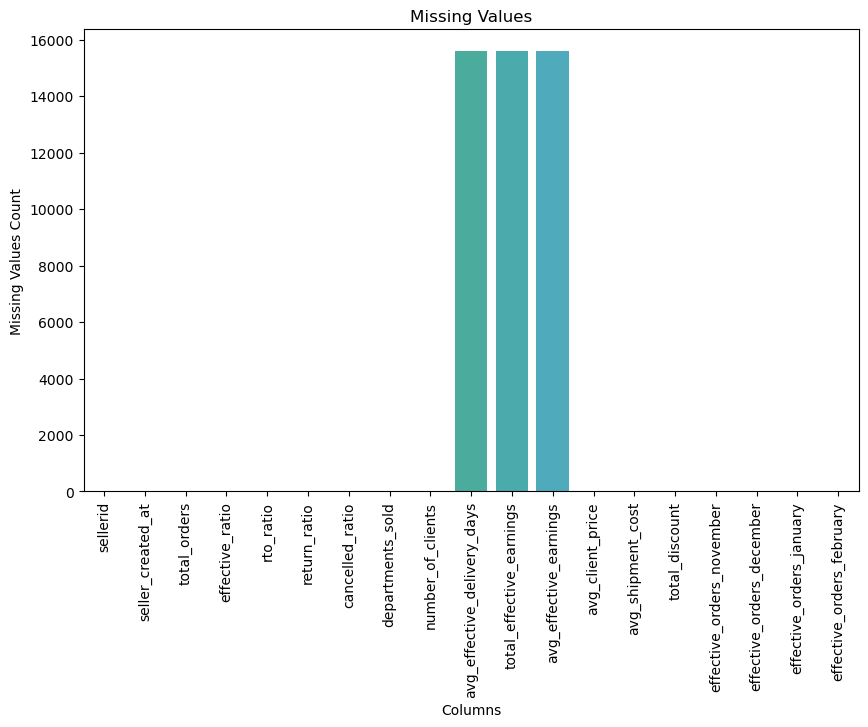

In [53]:
#Missing values
nan_vis(df02sellers)

In [54]:
# Imputing with 0
replace_nan_with_zero(df02sellers, ["total_effective_earnings", "avg_effective_earnings"])

#Imputing with 6 the avg delivery days (based on insight of the iteration 1)
df02sellers["avg_effective_delivery_days"] = df02sellers["avg_effective_delivery_days"].fillna(6)


#Sanity check
nan_vis(df02sellers)

'There are no missing values'

In [55]:
#Converting to datetime
#1, turning it to a datetime
df02sellers["seller_created_at"] = pd.to_datetime(df02sellers["seller_created_at"], utc=True)

#2, strings in the desired format
df02sellers["seller_created_at"] = df02sellers["seller_created_at"].dt.strftime('%Y-%m-%d')

#3 Convert it back to datetime 
df02sellers["seller_created_at"] = pd.to_datetime(df02sellers['seller_created_at'])

In [56]:
#Sanity check
df02sellers.dtypes

sellerid                                int64
seller_created_at              datetime64[ns]
total_orders                            int64
effective_ratio                       float64
rto_ratio                             float64
return_ratio                          float64
cancelled_ratio                       float64
departments_sold                        int64
number_of_clients                       int64
avg_effective_delivery_days           float64
total_effective_earnings              float64
avg_effective_earnings                float64
avg_client_price                      float64
avg_shipment_cost                     float64
total_discount                        float64
effective_orders_november               int64
effective_orders_december               int64
effective_orders_january                int64
effective_orders_february               int64
dtype: object

In [57]:
df02sellers.count()

sellerid                       47704
seller_created_at              47704
total_orders                   47704
effective_ratio                47704
rto_ratio                      47704
return_ratio                   47704
cancelled_ratio                47704
departments_sold               47704
number_of_clients              47704
avg_effective_delivery_days    47704
total_effective_earnings       47704
avg_effective_earnings         47704
avg_client_price               47704
avg_shipment_cost              47704
total_discount                 47704
effective_orders_november      47704
effective_orders_december      47704
effective_orders_january       47704
effective_orders_february      47704
dtype: int64

In [58]:
df02sellers.rename(columns={"sellerid": "seller_id"}, inplace=True)

## Target variable

In [59]:
dftarget = pd.read_csv('../Data/elenas-it2_target.csv')

In [60]:
dftarget.head(5)

,seller_id,orders_last_month
0,3,0
1,6,0
2,20,0
3,31,0
4,46,0


In [61]:
#Turning the target variable into a binnary column
dftarget["churn"] = dftarget["orders_last_month"].map(lambda x: 0 if x >=1 else 1)


#Removing the orders last month column
dftarget.drop("orders_last_month", axis=1, inplace=True)

#Sanity check
dftarget.head(5)

,seller_id,churn
0,3,1
1,6,1
2,20,1
3,31,1
4,46,1


In [62]:
df02sellers2 = pd.merge(df02sellers, dftarget, on="seller_id", how="left")

In [63]:
print(df02sellers2["churn"].value_counts())
print(f"{8944/(8944+38760)*100}% of the sellers have not churned")

1    38760
0     8944
Name: churn, dtype: int64
18.74895186986416% of the sellers have not churned


## Referrals

In [64]:
dfreferrals = pd.read_excel("../Data/referrals.xlsx")

In [65]:
dfreferrals.head(5)

,seller_id,is_referred,referred_by_seller_id
0,10030084,1,10306503
1,10030089,1,10299985
2,10030090,1,10305933
3,10030095,1,10178862
4,10030098,1,22098


In [66]:
dfreferrals.count()

seller_id                102580
is_referred              102580
referred_by_seller_id    102580
dtype: int64

In [67]:
#Removing referred by seller id 
dfreferrals.drop("referred_by_seller_id", axis=1, inplace=True)

In [68]:
#Sanity check
print(f'Number of referred sellers {dfreferrals["is_referred"].value_counts()}')

print(f'Number of sellers (original Df: {df02sellers2["seller_id"].count()}')

Number of referred sellers 1    102580
Name: is_referred, dtype: int64
Number of sellers (original Df: 47704


In [69]:
df02sellers3 = pd.merge(df02sellers2, dfreferrals, on="seller_id", how="left")

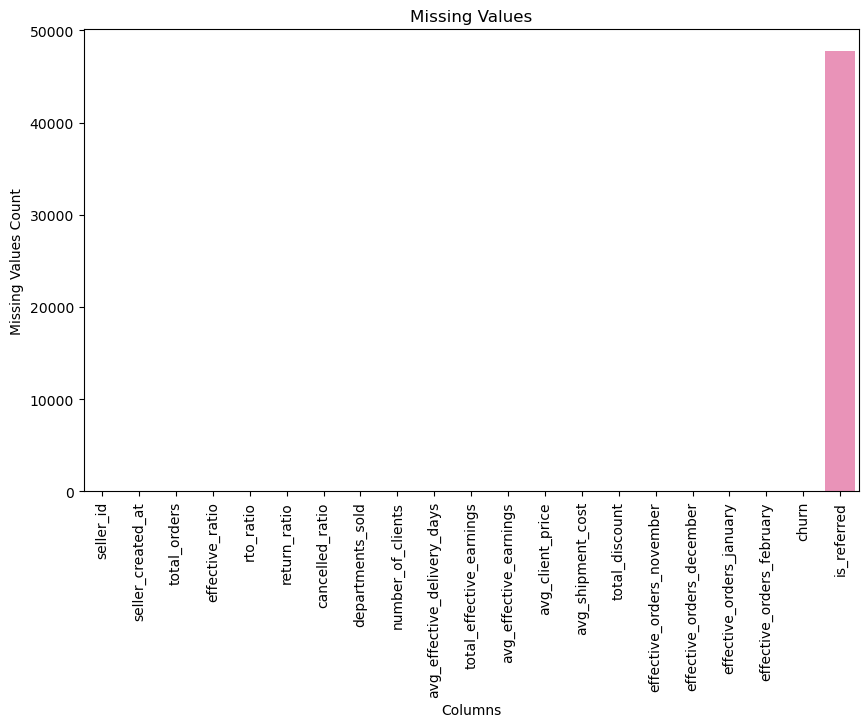

,seller_id,seller_created_at,total_orders,effective_ratio,rto_ratio,return_ratio,cancelled_ratio,departments_sold,number_of_clients,avg_effective_delivery_days,...,avg_effective_earnings,avg_client_price,avg_shipment_cost,total_discount,effective_orders_november,effective_orders_december,effective_orders_january,effective_orders_february,churn,is_referred
0,11415920,2022-09-30,1,1.000000,0.000000,0.000000,0.000000,1,1,2.000000,...,5600.000000,32500.000000,0.000000,0.0,0,0,0,0,1,0.0
1,11415923,2022-09-30,70,0.685714,0.142857,0.014286,0.157143,4,47,6.729167,...,7779.354167,68062.857143,8231.428571,0.0,2,8,7,4,0,0.0
2,11415930,2022-09-30,2,1.000000,0.000000,0.000000,0.000000,1,1,10.000000,...,4300.000000,28900.000000,5500.000000,0.0,1,0,0,0,1,0.0
3,11415933,2022-09-30,7,0.428571,0.285714,0.000000,0.285714,1,1,3.333333,...,1400.000000,74799.857143,7857.142857,0.0,1,0,0,2,1,0.0
4,11415940,2022-09-30,2,0.500000,0.000000,0.000000,0.500000,2,2,9.000000,...,10700.000000,56500.000000,3750.000000,0.0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47699,11886487,2023-04-27,1,1.000000,0.000000,0.000000,0.000000,1,1,0.000000,...,2708.000000,12900.000000,0.000000,0.0,0,0,0,0,0,0.0
47700,11886505,2023-04-27,1,1.000000,0.000000,0.000000,0.000000,1,1,0.000000,...,19965.000000,241900.000000,7500.000000,0.0,0,0,0,0,0,0.0
47701,11886533,2023-04-27,1,1.000000,0.000000,0.000000,0.000000,1,1,0.000000,...,11802.000000,113600.000000,14000.000000,0.0,0,0,0,0,0,0.0
47702,11886542,2023-04-27,2,1.000000,0.000000,0.000000,0.000000,1,1,0.000000,...,6905.500000,54800.000000,11000.000000,0.0,0,0,0,0,0,0.0


In [70]:
#Sanity check:
df02sellers3["seller_id"].count()

#Reviewing the zero values
nan_vis(df02sellers3)

#Replacing with 0
replace_nan_with_zero(df02sellers3, ["is_referred"])



In [71]:
#Sanity check
nan_vis(df02sellers3)

'There are no missing values'

## Products

In [72]:
dfproducts = pd.read_csv("../data/elenas-it2_cart_agg.csv")
dfproducts.head(5)

,seller_id,avg_cart_items,avg_vendor_discount,number_of_products,number_of_photos,number_of_categories,average_prod_existence_days
0,11415920,1.0,0.000000,1,0,1,565.000000
1,11415923,1.0,6417.876712,46,0,16,456.986301
2,11415930,1.0,0.000000,2,0,2,618.500000
3,11415933,1.0,4456.714286,7,0,5,612.857143
4,11415940,1.0,0.000000,2,0,2,310.500000


In [73]:
dfproducts.drop("number_of_photos", axis=1, inplace=True)

In [74]:
#Organizing the values
dfproducts["average_prod_existence_days"] = dfproducts["average_prod_existence_days"].round(0)
dfproducts["avg_vendor_discount"] = dfproducts["avg_vendor_discount"].round(0)

dfproducts.head(2)

,seller_id,avg_cart_items,avg_vendor_discount,number_of_products,number_of_categories,average_prod_existence_days
0,11415920,1.0,0.0,1,1,565.0
1,11415923,1.0,6418.0,46,16,457.0


In [75]:
#Joining the DFs
df02sellers4 = pd.merge(df02sellers3, dfproducts, on="seller_id", how="left")

#Sanity check:
df02sellers4.head(5)


,seller_id,seller_created_at,total_orders,effective_ratio,rto_ratio,return_ratio,cancelled_ratio,departments_sold,number_of_clients,avg_effective_delivery_days,...,effective_orders_december,effective_orders_january,effective_orders_february,churn,is_referred,avg_cart_items,avg_vendor_discount,number_of_products,number_of_categories,average_prod_existence_days
0,11415920,2022-09-30,1,1.000000,0.000000,0.000000,0.000000,1,1,2.000000,...,0,0,0,1,0.0,1.0,0.0,1,1,565.0
1,11415923,2022-09-30,70,0.685714,0.142857,0.014286,0.157143,4,47,6.729167,...,8,7,4,0,0.0,1.0,6418.0,46,16,457.0
2,11415930,2022-09-30,2,1.000000,0.000000,0.000000,0.000000,1,1,10.000000,...,0,0,0,1,0.0,1.0,0.0,2,2,618.0
3,11415933,2022-09-30,7,0.428571,0.285714,0.000000,0.285714,1,1,3.333333,...,0,0,2,1,0.0,1.0,4457.0,7,5,613.0
4,11415940,2022-09-30,2,0.500000,0.000000,0.000000,0.500000,2,2,9.000000,...,0,0,0,1,0.0,1.0,0.0,2,2,310.0


In [76]:
#Organizing the decimals:
decimal_cols = ["effective_ratio", "rto_ratio", "return_ratio", "cancelled_ratio", "avg_effective_delivery_days"]

for col in decimal_cols:
    df02sellers4[col] = df02sellers4[col].round(2)

In [77]:
#Sanity check:
df02sellers4.head(5)


,seller_id,seller_created_at,total_orders,effective_ratio,rto_ratio,return_ratio,cancelled_ratio,departments_sold,number_of_clients,avg_effective_delivery_days,...,effective_orders_december,effective_orders_january,effective_orders_february,churn,is_referred,avg_cart_items,avg_vendor_discount,number_of_products,number_of_categories,average_prod_existence_days
0,11415920,2022-09-30,1,1.00,0.00,0.00,0.00,1,1,2.00,...,0,0,0,1,0.0,1.0,0.0,1,1,565.0
1,11415923,2022-09-30,70,0.69,0.14,0.01,0.16,4,47,6.73,...,8,7,4,0,0.0,1.0,6418.0,46,16,457.0
2,11415930,2022-09-30,2,1.00,0.00,0.00,0.00,1,1,10.00,...,0,0,0,1,0.0,1.0,0.0,2,2,618.0
3,11415933,2022-09-30,7,0.43,0.29,0.00,0.29,1,1,3.33,...,0,0,2,1,0.0,1.0,4457.0,7,5,613.0
4,11415940,2022-09-30,2,0.50,0.00,0.00,0.50,2,2,9.00,...,0,0,0,1,0.0,1.0,0.0,2,2,310.0


In [78]:
nan_vis(df02sellers4)

'There are no missing values'

In [79]:
dfproducts2 = pd.read_csv('../data/elenas-it2_product_shared.csv')

dfproducts2.head(2)

,id,total_products_shared
0,11415881,0
1,11415882,0


In [80]:
#Number of sellers
dfproducts2["id"].count()

#Renaming the id column
dfproducts2.rename(columns={"id": "seller_id"}, inplace=True)

In [81]:
#Merging the files
df02sellers5 = pd.merge(df02sellers4, dfproducts2, on="seller_id", how="left")

In [82]:
#Checking missing values
nan_vis(df02sellers5)

'There are no missing values'

## Credits & Vouchers

In [83]:
dfvouchers = pd.read_csv('../data/elenas-it2_vouchers.csv')

In [84]:
#Reviewing missing values
print(nan_vis(dfvouchers))

#df head
dfvouchers.head(3)

There are no missing values


,seller_id,number_of_vouchers
0,11415881,7
1,11415882,8
2,11415883,6


In [85]:
df02sellers6 = pd.merge(df02sellers5, dfvouchers, on="seller_id", how="left")

In [86]:
#Credits info
dfcredits = pd.read_csv("../data/elenas-it2_credits.csv")

#Header
dfcredits.head(3)

,seller_id,number_of_credits,number_of_used_credits,avg_credit_amount
0,11415881,0,0,NaN
1,11415882,0,0,NaN
2,11415883,0,0,NaN


In [87]:
replace_nan_with_zero(dfcredits, ["avg_credit_amount"])

,seller_id,number_of_credits,number_of_used_credits,avg_credit_amount
0,11415881,0,0,0.0
1,11415882,0,0,0.0
2,11415883,0,0,0.0
3,11415884,0,0,0.0
4,11415885,0,0,0.0
...,...,...,...,...
470693,11886605,0,0,0.0
470694,11886606,0,0,0.0
470695,11886607,0,0,0.0
470696,11886608,0,0,0.0


In [88]:
df02sellers6 = pd.merge(df02sellers6, dfcredits, on="seller_id", how="left")

In [89]:
nan_vis(df02sellers6)

'There are no missing values'

In [90]:
#Checkpoint:
df02sellers6.to_csv('../Data/elenas-it2-postwrangling.csv')